<a href="https://colab.research.google.com/github/CamilloDias/projeto_aplicado/blob/main/Camillo_Analise_de_dados_70_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISE PREDITIVA E VANTAGEM COMPETITIVA**
## Projeto final: ANÁLISE DE DADOS FINANCEIROS
### Aluno: Camillo Martins dias Neto 
### Matrícula: 202204132435
### Curso: MBA em BI & Data Science (Barra)
### Professor: Sérgio Assunção Monteiro

**INSTALAÇÃO DOS PACOTES**

In [ ]:
# Instalando o yahoo finance
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
!pip install requests

In [ ]:
!pip install --upgrade pandas

In [ ]:
!pip install mip

**IMPORTAÇÃO DAS BIBLIOTECAS**

In [32]:
import seaborn as sns
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

**DEFININDO O DATAFRAME COM O VALOR DAS AÇÕES**

In [33]:
# Montando o data frame com as ações
tickers = ['PETR4.SA', 'BRKM5.SA', 'SBSP3.SA', 'SUZB3.SA', 'UNIP6.SA', 'VALE3.SA', 'GGBR4.SA', 'ELET6.SA', 'PRIO3.SA', 'WEGE3.SA']

df = yf.download(tickers, start='2020-01-01', end='2024-03-23',group_by="ticker");

[*********************100%***********************]  10 of 10 completed


**DEFININDO O DATAFRAME COM O VALOR DE FECHAMENTO DAS AÇÕES**

In [34]:
# Retornar um novo dataframe chamado "df_close", contendo apenas os valores de fechamento das ações para cada um dos tickers.
# A função "droplevel" é utilizada para remover o nível extra de coluna gerado pela função "group_by", deixando apenas o nome dos tickers como colunas.
df_close = df.loc[:, (slice(None), 'Close')].droplevel(1, axis=1)
df_close.head()

,UNIP6.SA,ELET6.SA,VALE3.SA,SUZB3.SA,SBSP3.SA,GGBR4.SA,PRIO3.SA,PETR4.SA,WEGE3.SA,BRKM5.SA
Date,,,,,,,,,,
2020-01-02,31.954544,38.709999,54.330002,40.790001,60.549999,19.771427,7.156,30.700001,17.620001,30.400000
2020-01-03,30.600000,38.549999,53.930000,40.650002,59.509998,19.447618,7.570,30.450001,17.395000,31.750000
2020-01-06,31.363636,38.610001,53.610001,40.580002,58.599998,19.400000,7.718,30.809999,17.440001,33.400002
2020-01-07,31.145454,39.200001,54.000000,41.099998,57.599998,19.704762,7.728,30.690001,17.575001,32.529999
2020-01-08,32.272728,39.529999,54.009998,43.150002,56.750000,19.780952,7.570,30.500000,16.910000,34.160000


**EXIBE UM GRÁFICO DO VALOR DE FECHAMENTO DAS AÇÕES EM FUNÇÃO DO TEMPO**

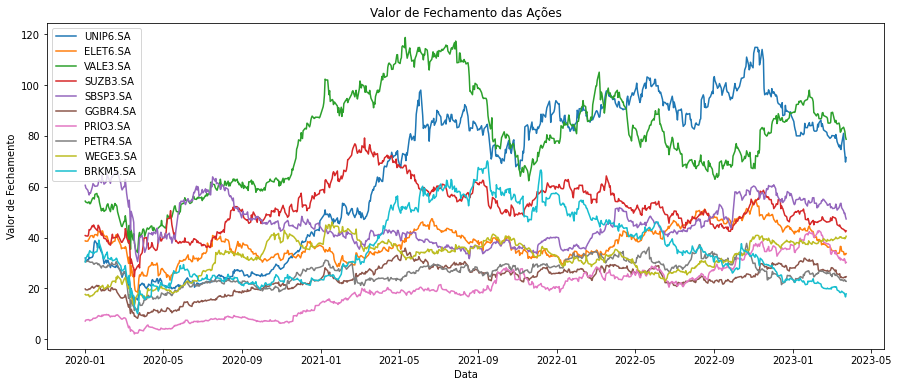

In [35]:
# Define a largura e a altura do gráfico
plt.figure(figsize=(15, 6))

# Este código gera um gráfico de linha com o valor de fechamento de cada ação ao longo do tempo
for col in df_close.columns:
    plt.plot(df_close.index, df_close[col], label=col)

# Adiciona legenda e título ao gráfico
plt.legend()
plt.title('Valor de Fechamento das Ações')
plt.xlabel('Data')
plt.ylabel('Valor de Fechamento')

# Exibe o gráfico
plt.show()

**EXIBE OS HISTOGRAMAS DO VALOR DE FECHAMENTO DAS AÇÕES**

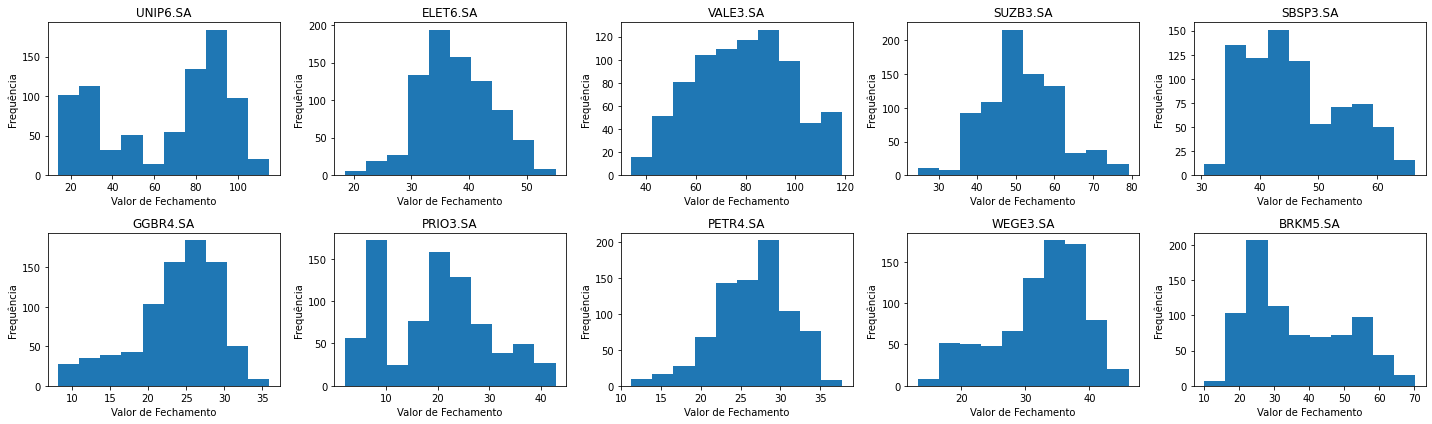

In [61]:
# Cria um subplot para cada ação
ffig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 6))

for i, ax in enumerate(axs.flatten()):
    col = df_close.columns[i]
    ax.hist(df_close[col])
    ax.set_title(col)
    ax.set_xlabel('Valor de Fechamento')
    ax.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

**CRIAÇÃO DO MODELO DE REDES NEURAIS**
* Normalização dos dados;
* Divisão do conjunto de treinamento e teste;
* Definição da janela de dados para o modelo;
* Criação do modelo LSTM Keras;
* Treinamento do modelo;
* Avaliação do modelo;
* Previsões;
* Exibição.

O loop "for" repete o processo acima para os 10 ativos.


Ticker: PETR4.SA MSE: 0.0019290896598249674
5/5 [==============================] - 1s 11ms/step


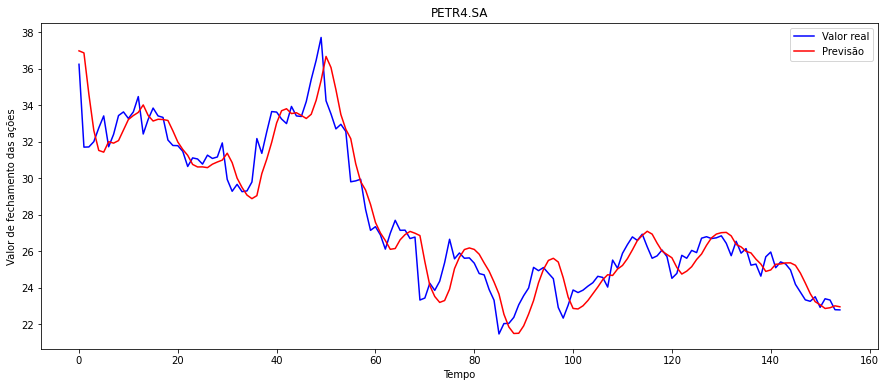

1/1 [==============================] - 0s 27ms/step
PETR4.SA: 
 today's value: 22.799999237060547 
 prediction: 22.959888458251953 
 ganho: 0.70%
Ticker: BRKM5.SA MSE: 0.0004391476104501635
5/5 [==============================] - 1s 11ms/step


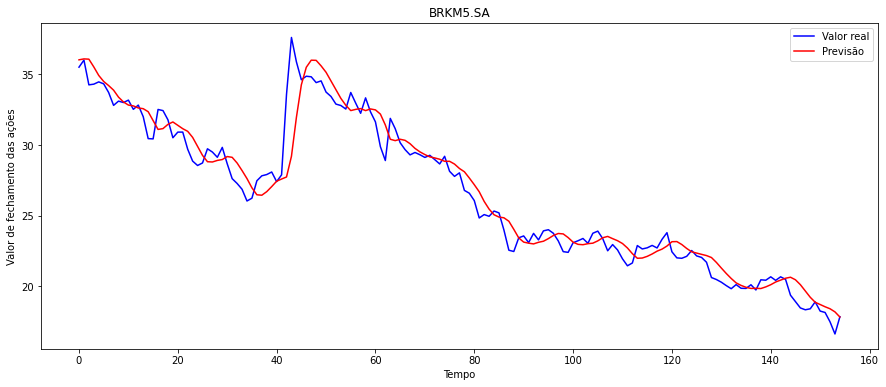

1/1 [==============================] - 0s 42ms/step
BRKM5.SA: 
 today's value: 16.639999389648438 
 prediction: 17.83675765991211 
 ganho: 6.71%
Ticker: SBSP3.SA MSE: 0.0029558048117905855
5/5 [==============================] - 1s 11ms/step


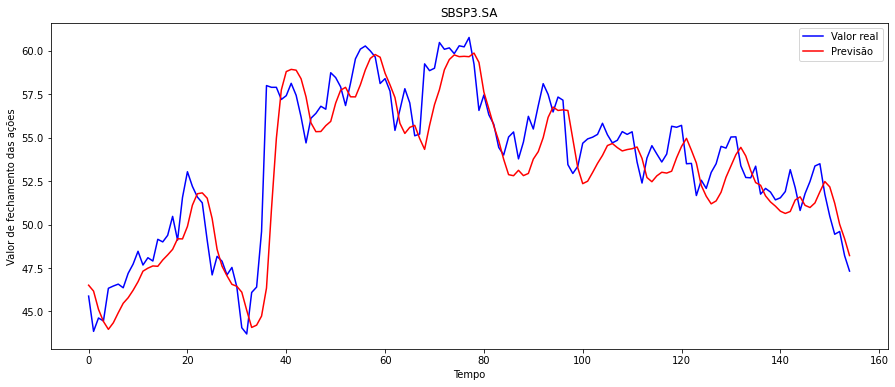

1/1 [==============================] - 0s 26ms/step
SBSP3.SA: 
 today's value: 48.209999084472656 
 prediction: 48.214263916015625 
 ganho: 0.01%
Ticker: SUZB3.SA MSE: 0.0009483073954470456
5/5 [==============================] - 1s 12ms/step


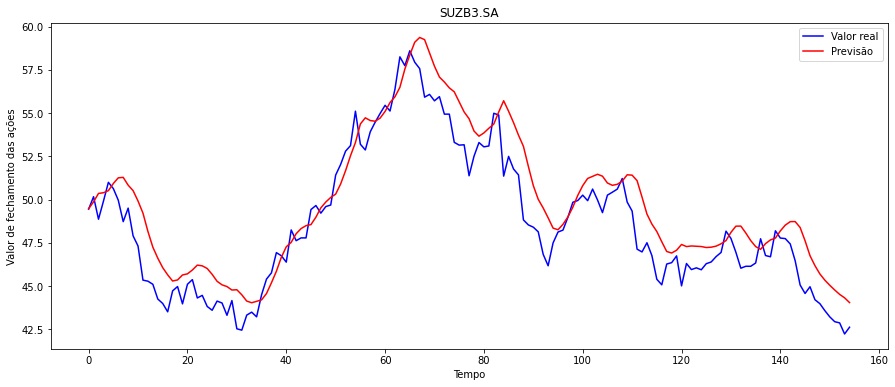

1/1 [==============================] - 0s 25ms/step
SUZB3.SA: 
 today's value: 42.2400016784668 
 prediction: 44.05421447753906 
 ganho: 4.12%
Ticker: UNIP6.SA MSE: 0.0016412207623943686
5/5 [==============================] - 1s 12ms/step


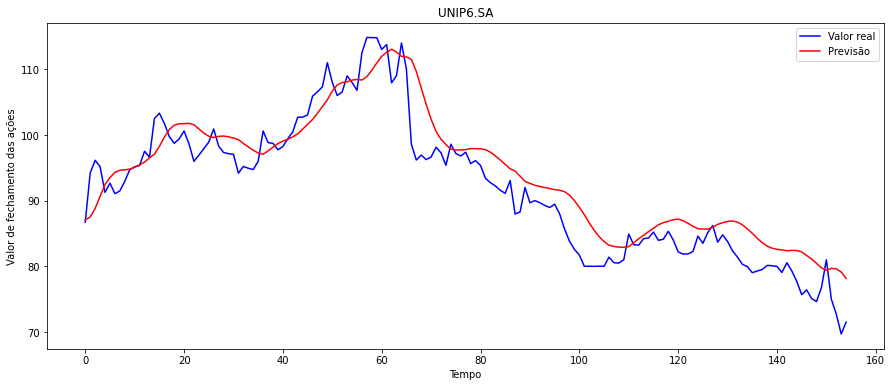

1/1 [==============================] - 0s 27ms/step
UNIP6.SA: 
 today's value: 69.6999969482422 
 prediction: 78.16259765625 
 ganho: 10.83%
Ticker: VALE3.SA MSE: 0.0008423083927482367
5/5 [==============================] - 1s 11ms/step


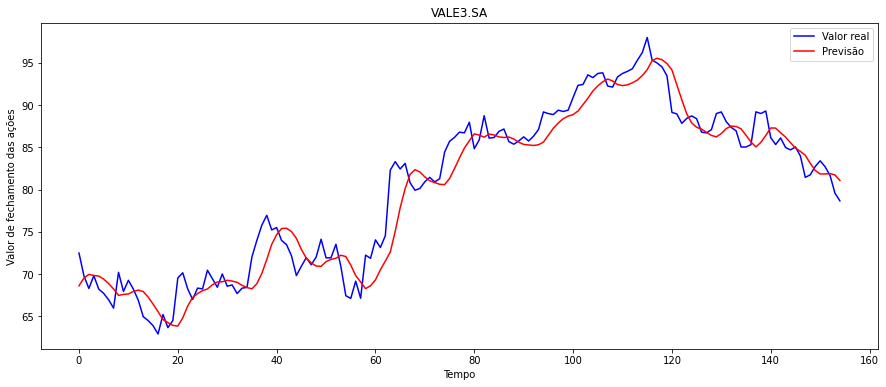

1/1 [==============================] - 0s 26ms/step
VALE3.SA: 
 today's value: 79.58000183105469 
 prediction: 81.0796127319336 
 ganho: 1.85%
Ticker: GGBR4.SA MSE: 0.0009161312482319772
5/5 [==============================] - 1s 12ms/step


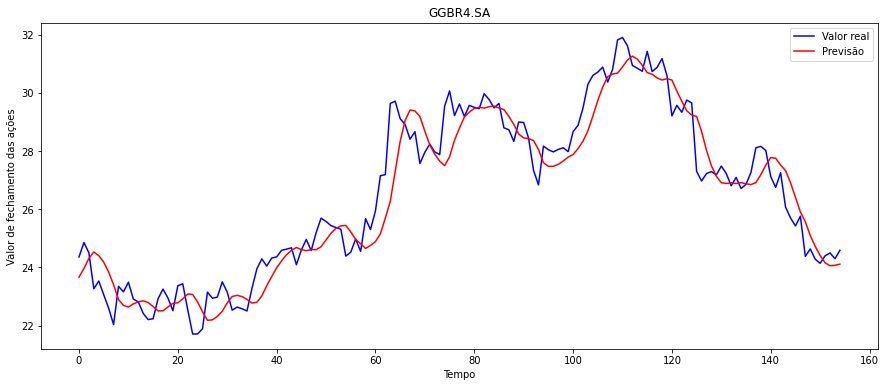

1/1 [==============================] - 0s 29ms/step
GGBR4.SA: 
 today's value: 24.299999237060547 
 prediction: 24.114919662475586 
 ganho: -0.77%
Ticker: ELET6.SA MSE: 0.0007531375740654767
5/5 [==============================] - 1s 12ms/step


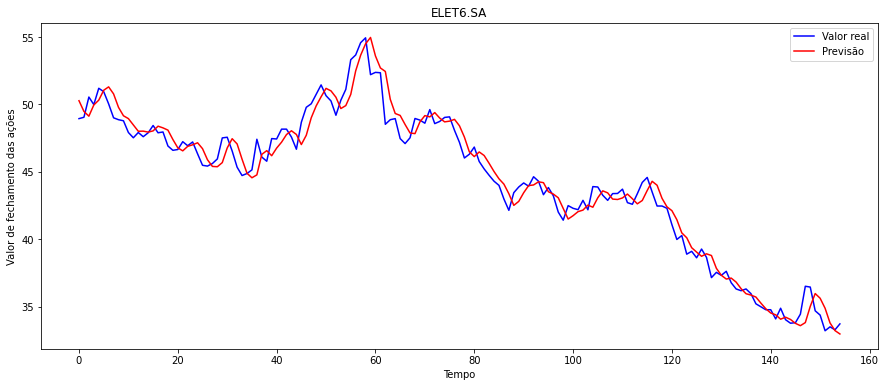

1/1 [==============================] - 0s 31ms/step
ELET6.SA: 
 today's value: 33.290000915527344 
 prediction: 32.9820671081543 
 ganho: -0.93%
Ticker: PRIO3.SA MSE: 0.0016964555252343416
5/5 [==============================] - 1s 12ms/step


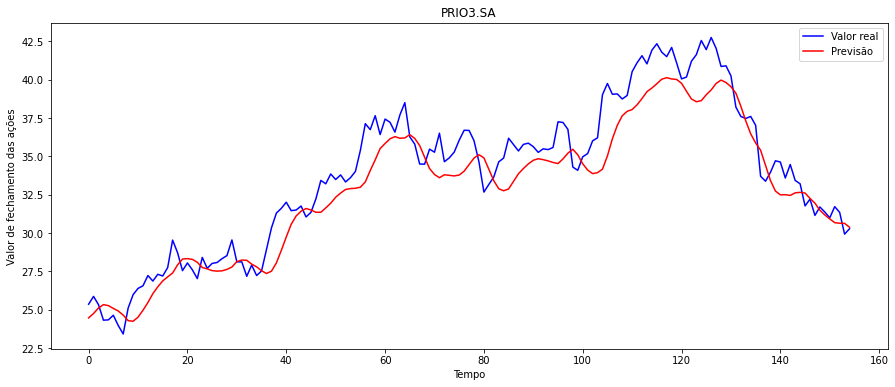

1/1 [==============================] - 0s 28ms/step
PRIO3.SA: 
 today's value: 29.93000030517578 
 prediction: 30.37464714050293 
 ganho: 1.46%
Ticker: WEGE3.SA MSE: 0.0006639377097599208
5/5 [==============================] - 1s 11ms/step


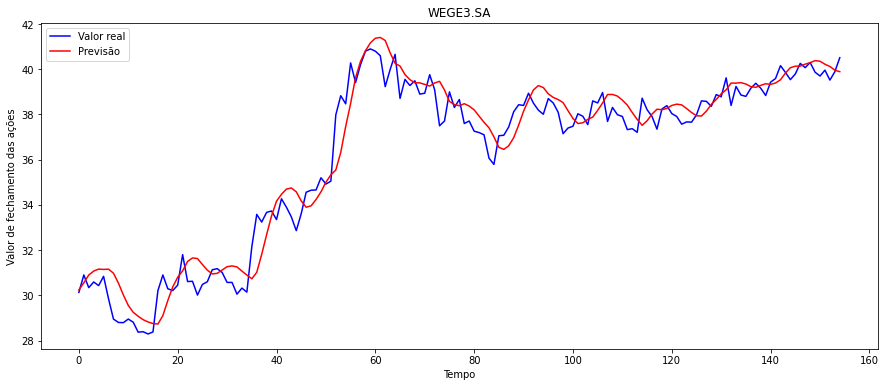

1/1 [==============================] - 0s 25ms/step
WEGE3.SA: 
 today's value: 39.88999938964844 
 prediction: 39.89259338378906 
 ganho: 0.01%


In [37]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

ganho = {}

for ticker in tickers:
    # Filtrar os dados para a ação correspondente
    data = df_close[ticker]
    
    # Normalização dos dados
    scaler = MinMaxScaler()
    data_norm = scaler.fit_transform(data.values.reshape(-1, 1))
    
    # Divisão dos dados em conjuntos de treinamento e teste
    X = []
    y = []
    timesteps = 30 # Definir o tamanho da janela de dados para o modelo
    for i in range(timesteps, len(data_norm)):
        X.append(data_norm[i-timesteps:i])
        y.append(data_norm[i])
    X, y = np.array(X), np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Criação do modelo LSTM com Keras
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Treinamento do modelo
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    
    # Avaliação do modelo
    loss = model.evaluate(X_test, y_test, verbose=0)
    print('Ticker:', ticker, 'MSE:', loss)
    
    # Fazer previsões para o conjunto de teste
    y_pred = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    # Exibir o gráfico de predição do valor de cada ação
    plt.figure(figsize=(15, 6))
    plt.plot(y_test, color='blue', label='Valor real')
    plt.plot(y_pred, color='red', label='Previsão')
    plt.title(ticker)
    plt.xlabel('Tempo')
    plt.ylabel('Valor de fechamento das ações')
    plt.legend()
    plt.show()

    # Cálculo do ganho
    last_price = scaler.inverse_transform(X_test[-1].reshape(1, -1))[0][-1]
    pred_price = scaler.inverse_transform(model.predict(X_test[-1].reshape(1, X_test.shape[1], 1)).reshape(1, -1))[0][0]
    gain = (pred_price - last_price) / pred_price

    ganho[ticker] = gain

    # Imprime os resultados: valor de hoje, previsão e o ganho em %
    print(f'{ticker}: \n today\'s value: {last_price} \n prediction: {pred_price} \n ganho: {gain * 100:2.2f}%')

**APLICANDO OS RESULTADOS NO PROBLEMA DA MOCHILA (KNAPSACK)**
####Os coeficientes $(g_i)$ são os ganhos calculado para cada ação.
####O Termo independente será $3$, um vez que desejamos limitar nosso investimento em 3 ações.

$$max\hspace{1cm}z = g_1 x_1 + g_2 x_2 + g_3 x_3 + g_4 x_4 + g_5 x_5 + g_6 x_6 + g_7 x_7 + g_8 x_8 + g_9 x_9 + g_{10} x_{10}$$

$$s.a.\hspace{1cm}z = x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 + x_{10}\leq3$$

$$x_i \in \{0,1\}, \quad i = 1, \ldots, 10$$


In [38]:
# Estabelecendo os coeficientes da função objetivo, restrição e o termo independente
coef_obj=list(ganho.values())
coef_rest = [1]*10
termo_ind = 3

**Otimização do modelo**

In [39]:
from mip import Model, maximize, xsum, CBC, BINARY, OptimizationStatus
I = range(len(coef_obj))
m = Model("knapsack")
x = [m.add_var(var_type=BINARY) for i in I]
m.objective = maximize(xsum(coef_obj[i] * x[i] for i in I))
m += xsum(coef_rest[i] * x[i] for i in I) <= termo_ind
print(f'O modelo tem {m.num_cols} variável(eis), {m.num_rows} restrição(ões) e {m.num_nz} zero(s)')

O modelo tem 10 variável(eis), 1 restrição(ões) e 10 zero(s)


In [40]:
status = m.optimize(max_seconds=10)
if status == OptimizationStatus.OPTIMAL:
  print('Otimizado com sucesso!')
else:
  print('A otimização falhou')


Otimizado com sucesso!


In [53]:
# Mostrando as ações selecionadas pelo modelo
itens_selecionados = [list(ganho.keys())[i] for i in range(len(ganho)) if x[i].x >= 0.99]
print("Itens selecionados: {}".format(itens_selecionados))

# Mostrando o valor do retorno otimizado
print(f'Retorno otimizado: {m.objective_value * 100:2.1f}%')

Itens selecionados: ['BRKM5.SA', 'SUZB3.SA', 'UNIP6.SA']
Retorno otimizado: 21.7%
